<a href="https://www.kaggle.com/code/rayaldred/harold-potter-wordclouds?scriptVersionId=118412536" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/harold-potter-wordclouds/__results__.html
/kaggle/input/harold-potter-wordclouds/__notebook__.ipynb
/kaggle/input/harold-potter-wordclouds/__output__.json
/kaggle/input/harold-potter-wordclouds/custom.css
/kaggle/input/harold-potter-wordclouds/__results___files/__results___20_0.png
/kaggle/input/harold-potter-wordclouds/__results___files/__results___22_0.png
/kaggle/input/harold-potter-wordclouds/__results___files/__results___24_0.png
/kaggle/input/harold-potter-wordclouds/__results___files/__results___30_0.png
/kaggle/input/harold-potter-wordclouds/__results___files/__results___18_0.png
/kaggle/input/harold-potter-wordclouds/__results___files/__results___32_0.png
/kaggle/input/harold-potter-wordclouds/__results___files/__results___26_0.png
/kaggle/input/harold-potter-wordclouds/__results___files/__results___28_0.png
/kaggle/input/harry-potter-books-corpora-part-1-7/Book2.txt
/kaggle/input/harry-potter-books-corpora-part-1-7/Book5.txt
/kaggle/input/harry-potter-books-corp

![](https://cdna.artstation.com/p/assets/images/images/026/173/842/large/arch-apolar-91932739-141160437421628-2516622656728465408-o.jpg?1588087446)

# **Introduction**

Word Clouds are a visualization technique for texts that are natively used for visualizing the tags or keywords from a text or website. These keywords are typically a part the context of the text or website. In this notebook, I will generate a word cloud for all seven texts of the Harry Potter books: 
* **Book 1 - Harry Potter and the Sorcerer's Stone** 📚 
* **Book 2 - Harry Potter and the Chamber of Secrets** 📚
* **Book 3 - Harry Potter and the Prisoner of Azkaban** 📚
* **Book 4 - Harry Potter and the Goblet of Fire**  📚
* **Book 5 - Harry Potter and the Order of the Phoenix** 📚 
* **Book 6 - Harry Potter and the Half-Blood Prince** 📚
* **Book 7 - Harry Potter and the Deathly Hallows**  📚

At the end, I will finally generate a word cloud for all seven books together. 

# **1. Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string

# **2. Read and Clean the First Book**

Thanks to @balabaskar for doing the code to clean this. I modified a bit, but thank you anyways! 

In [3]:
book1 = open('../input/harry-potter-books-corpora-part-1-7/Book1.txt', 'r').read()
book1[10000:12000]

'ared his throat nervously. “Er \n— Petunia, dear — you haven’t heard from your sister \nlately, have you?” \n\nAs he had expected, Mrs. Dursley looked shocked and \nangry. After all, they normally pretended she didn’t \nhave a sister. \n\n“No,” she said sharply. “Why?” \n\n“Funny stuff on the news,” Mr. Dursley mumbled. \n“Owls . . . shooting stars . . . and there were a lot of \nfunny-looking people in town today ...” \n\n“So?” snapped Mrs. Dursley. \n\n“Well, I just thought ... maybe ... it was something to \ndo with ... you know ... her crowd.” \n\nMrs. Dursley sipped her tea through pursed lips. Mr. \nDursley wondered whether he dared tell her he’d \nheard the name “Potter.” He decided he didn’t dare. \nInstead he said, as casually as he could, “Their son — \nhe’d be about Dudley’s age now, wouldn’t he?” \n\n“I suppose so,” said Mrs. Dursley stiffly. \n\n“What’s his name again? Howard, isn’t it?” \n\n“Harry. Nasty, common name, if you ask me.” \n\n“Oh, yes,” said Mr. Dursley, his 

Looking at the above, we have to remove the '\n' from the text. 

In [4]:
book1_cln = re.sub('\n','',book1)

We also must make the whole text in lower case.

In [5]:
book1_cln = book1_cln.lower()

I don't think this matters, but I'm going to take the punctuation marks out of the text. 

In [6]:
for p in string.punctuation:
    book1_cln = book1_cln.replace(p,'')
book1_cln[10000:12000]

'd tell her he’d heard the name “potter” he decided he didn’t dare instead he said as casually as he could “their son — he’d be about dudley’s age now wouldn’t he” “i suppose so” said mrs dursley stiffly “what’s his name again howard isn’t it” “harry nasty common name if you ask me” “oh yes” said mr dursley his heart sinking horribly “yes i quite agree” he didn’t say another word on the subject as they went upstairs to bed while mrs dursley was in the bathroom mr dursley crept to the bedroom window page  8 harry potter and the philosophers stone  jk rowling and peered down into the front garden the cat was still there it was staring down privet drive as though it were waiting for something was he imagining things could all this have anything to do with the potters if it did  if it got out that they were related to a pair of — well he didn’t think he could bear it the dursleys got into bed mrs dursley fell asleep quickly but mr dursley lay awake turning it all over in his mind his last 

# **3. Get the Stop Words of the First Book**
**Stop words** are words that do not provide any useful information to infer content of a text. It may be either because they don't carry any meaning (prepositions, conjunctions, etc.) or because they are too frequent.

First we should get the most common words in the corpus, or the frequency of each word. We should notice that a lot of the words are stop words...except of course **HARRY**!  

In [7]:
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

word_list = book1_cln.split(' ')
word_counts = Counter(word_list)

for w in word_counts.most_common(20):
    print(f"{w[0]}:  \t{w[1]} ")


the:  	3932 
and:  	2220 
to:  	1848 
a:  	1666 
harry:  	1507 
he:  	1498 
of:  	1249 
was:  	1185 
:  	974 
in:  	952 
his:  	934 
it:  	926 
—:  	883 
said:  	794 
you:  	724 
had:  	700 
at:  	623 
on:  	619 
they:  	581 
that:  	566 


Next we will gradually remove the stop words, by creating a stop word list and a not stop word list. We will do this a bunch of times in our notebook, until we have remove all the words that don't carry any information. I will also include the word list that comes with the wordcloud library.       

In [8]:
# transform the text into a list of words
words_list = book1_cln.split(' ')
# define the list of words you want to remove from the text
stopwords = list(STOPWORDS)
m_stopwords = ['', '—', '”', 'jk', 'rowling', 'said', "didn’t", '“i', "don’t", "it’s", 's', '“you', 'page', '“well', 'll', 'd', '“but', '“and', "harry’s", 'it”', "he’d", 't', 'could', 'didn', 'don']
# use a python list comprehension to remove the stopwords from words_list
stopwords += m_stopwords
words_without_stopwords = [word for word in words_list if word not in stopwords]

for w in Counter(words_without_stopwords).most_common(50):
    print(f"{w[0]}:  \t{w[1]} ")

harry:  	1507 
stone:  	414 
potter:  	413 
ron:  	399 
philosophers:  	347 
hagrid:  	319 
hermione:  	250 
back:  	249 
one:  	237 
got:  	189 
know:  	174 
looked:  	169 
professor:  	164 
see:  	162 
around:  	140 
snape:  	139 
going:  	132 
dumbledore:  	129 
now:  	126 
think:  	121 
uncle:  	121 
never:  	116 
something:  	115 
time:  	114 
dudley:  	110 
look:  	110 
go:  	108 
eyes:  	104 
door:  	104 
even:  	103 
couldn’t:  	103 
first:  	102 
malfoy:  	101 
head:  	99 
looking:  	99 
vernon:  	99 
thought:  	95 
two:  	95 
right:  	94 
next:  	92 
told:  	92 
people:  	91 
neville:  	91 
still:  	90 
mcgonagall:  	90 
way:  	88 
face:  	88 
room:  	87 
yeh:  	86 
will:  	84 


# **4. Generating A Word Cloud For the First Book** 

We can finally generate the first word cloud! Huzzah! 

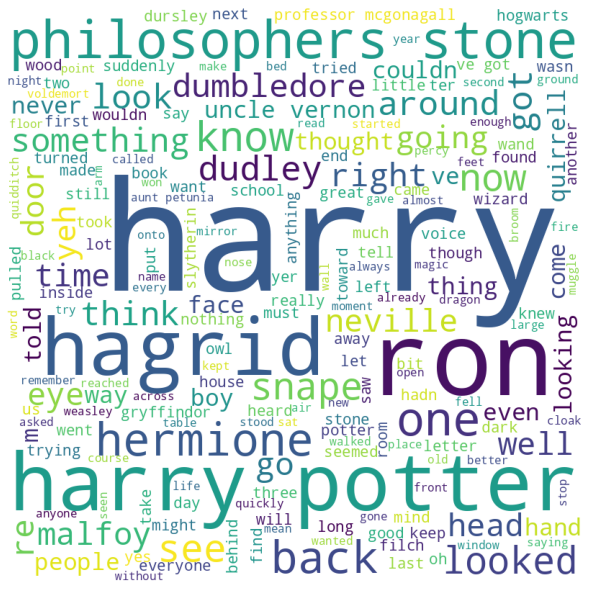

In [9]:
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = 'white',
                      stopwords = stopwords,  
                      min_font_size = 10).generate(book1_cln)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

# **5. Generating A Word Cloud For the Second Book**

Now we can do the word cloud for the other books. 

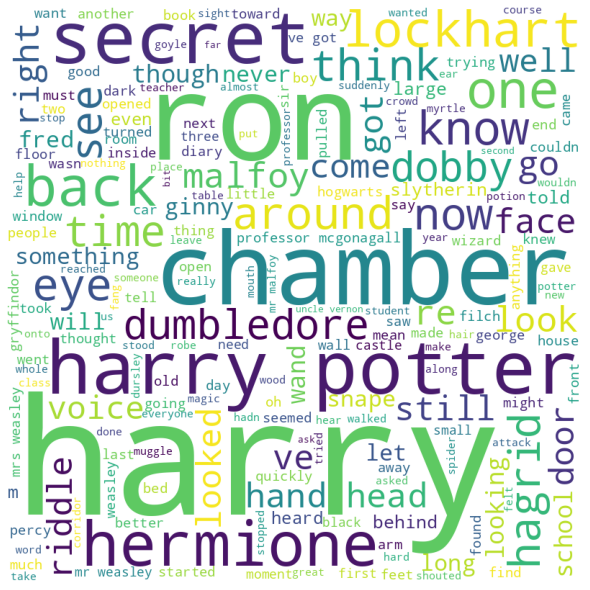

In [10]:
book2 = open('../input/harry-potter-books-corpora-part-1-7/Book2.txt', 'r').read()
book2_cln = re.sub('\n','',book2)
book2_cln = book2_cln.lower()
for p in string.punctuation:
    book2_cln = book2_cln.replace(p,'')

wordcloud2 = WordCloud(width = 800, height = 800, 
                      background_color = 'white',
                      stopwords = stopwords, 
                      min_font_size = 10).generate(book2_cln)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

# **6. Generating A Word Cloud For the Third Book**

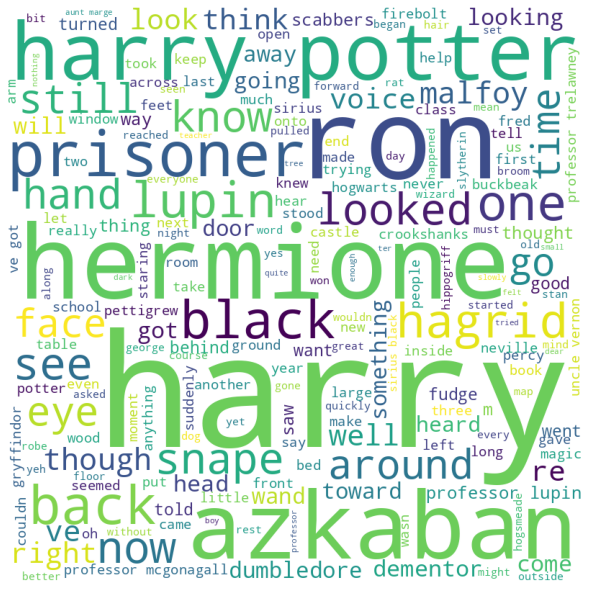

In [11]:
book3 = open('../input/harry-potter-books-corpora-part-1-7/Book3.txt', 'r').read()
book3_cln = re.sub('\n','',book3)
book3_cln = book3_cln.lower()
for p in string.punctuation:
    book3_cln = book3_cln.replace(p,'')

wordcloud3 = WordCloud(width = 800, height = 800, 
                      background_color = 'white',
                      stopwords = stopwords, 
                      min_font_size = 10).generate(book3_cln)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud3)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

# **7. Generating A Word Cloud For the Fourth Book**

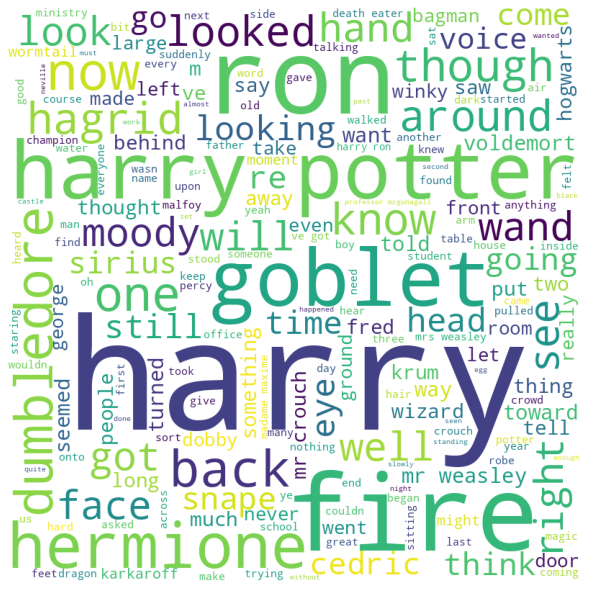

In [12]:
book4 = open('../input/harry-potter-books-corpora-part-1-7/Book4.txt', 'r').read()
book4_cln = re.sub('\n','',book4)
book4_cln = book4_cln.lower()
for p in string.punctuation:
    book4_cln = book4_cln.replace(p,'')
    
wordcloud4 = WordCloud(width = 800, height = 800, 
                      background_color = 'white',
                      stopwords = stopwords, 
                      min_font_size = 10).generate(book4_cln)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud4)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

# **8. Generating A Word Cloud For the Fifth Book**

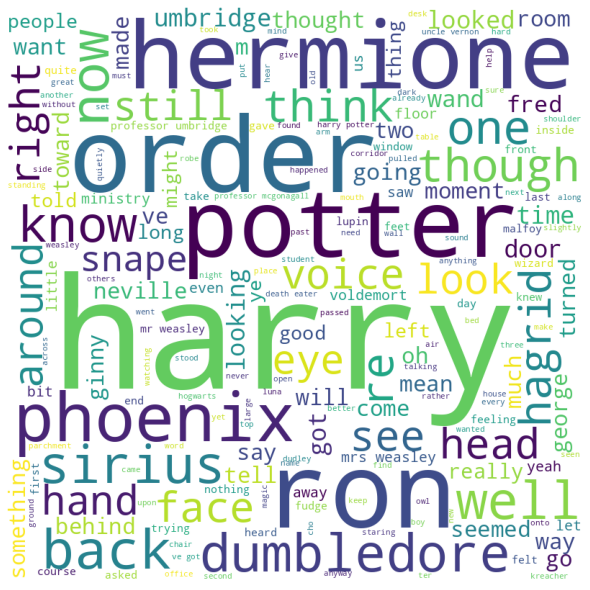

In [13]:
book5 = open('../input/harry-potter-books-corpora-part-1-7/Book5.txt', 'r').read()
book5_cln = re.sub('\n','',book5)
book5_cln = book5_cln.lower()
for p in string.punctuation:
    book5_cln = book5_cln.replace(p,'')

wordcloud5 = WordCloud(width = 800, height = 800, 
                      background_color = 'white',
                      stopwords = stopwords, 
                      min_font_size = 10).generate(book5_cln)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud5)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

# **9. Generating A Word Cloud For the Sixth Book**

# **9. Generating A Word Cloud For the Sixth Book**

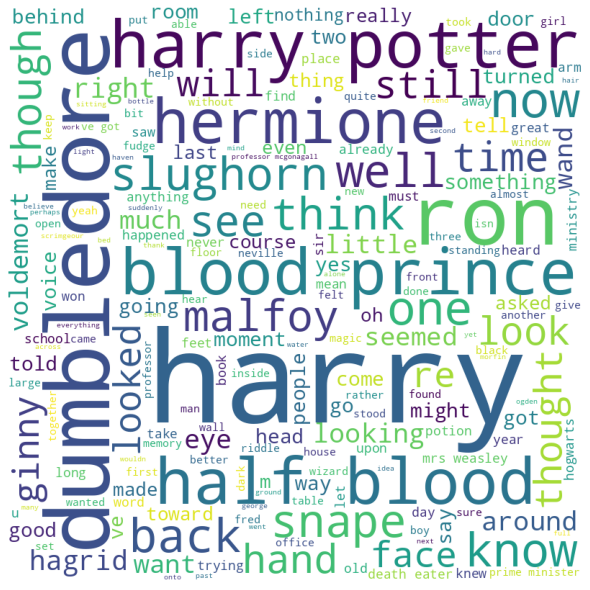

In [14]:
book6 = open('../input/harry-potter-books-corpora-part-1-7/Book6.txt', 'r').read()
book6_cln = re.sub('\n','',book6)
book6_cln = book6_cln.lower()
for p in string.punctuation:
    book6_cln = book6_cln.replace(p,'')

wordcloud6 = WordCloud(width = 800, height = 800, 
                      background_color = 'white',
                      stopwords = stopwords, 
                      min_font_size = 10).generate(book6_cln)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud6)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

# **10. Generating A Word Cloud For the Seventh Book**

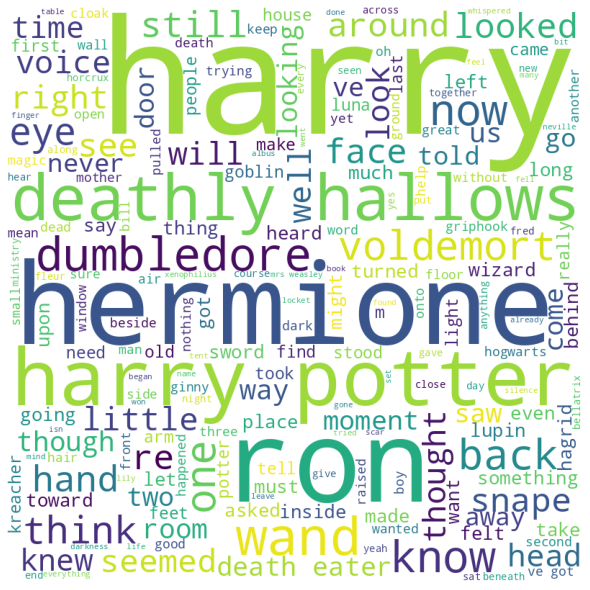

In [15]:
book7 = open('../input/harry-potter-books-corpora-part-1-7/Book7.txt', 'r').read()
book7_cln = re.sub('\n','',book7)
book7_cln = book7_cln.lower()
for p in string.punctuation:
    book7_cln = book7_cln.replace(p,'')

wordcloud7 = WordCloud(width = 800, height = 800, 
                      background_color = 'white',
                      stopwords = stopwords, 
                      min_font_size = 10).generate(book7_cln)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud7)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

# **11. Generating A Word Cloud For All of the Books!**

And with all of that out of the way, we can now generate a word cloud for **ALL** of the seven books. 

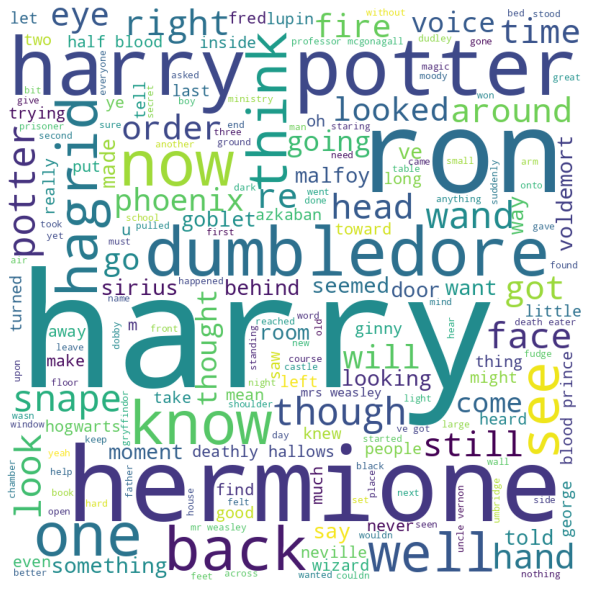

In [16]:
all_books = book1_cln + book2_cln + book3_cln + book4_cln + book5_cln + book6_cln + book7_cln

wordcloud8 = WordCloud(width = 800, height = 800, 
                      background_color = 'white',
                      stopwords = stopwords, 
                      min_font_size = 10).generate(all_books)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud8)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()